In [12]:
from datasets import load_dataset

In [13]:
dataset = load_dataset("yelp_review_full")

In [14]:
dataset["train"][0]

{'label': 4,
 'text': "dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank."}

In [15]:
dataset['train']['label'][:10]

[4, 1, 3, 3, 0, 4, 4, 0, 1, 2]

In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame(dataset['train'])
print(df.head())
print(df['label'].unique())

   label                                               text
0      4  dr. goldberg offers everything i look for in a...
1      1  Unfortunately, the frustration of being Dr. Go...
2      3  Been going to Dr. Goldberg for over 10 years. ...
3      3  Got a letter in the mail last week that said D...
4      0  I don't know what Dr. Goldberg was like before...
[4 1 3 0 2]


In [18]:
label_count = df['label'].value_counts()
print(label_count)

label
4    130000
1    130000
3    130000
0    130000
2    130000
Name: count, dtype: int64


In [19]:
df['text_length'] = df['text'].apply(len)
print(df['text_length'].describe()) 

count    650000.000000
mean        732.325468
std         663.721184
min           1.000000
25%         287.000000
50%         539.000000
75%         957.000000
max        5637.000000
Name: text_length, dtype: float64


In [21]:
pip install matplotlib

     |████████████████████████████████| 7.8 MB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 21.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 14.8 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 22.3 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 18.9 MB/s eta 0:00:01
You should consider upgrading via the '/Users/Iris/PythonCourse/ml_yelp/venv/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


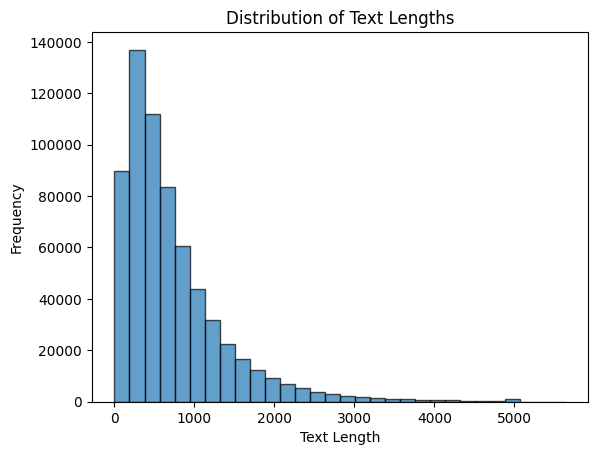

In [23]:
df['text_length'].plot.hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

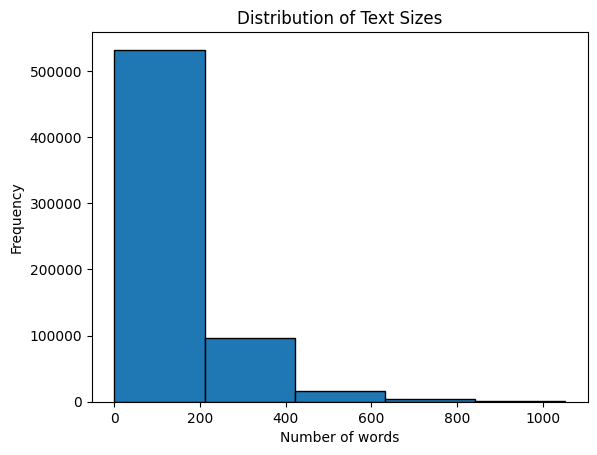

In [32]:
sizes = df['text'].apply(lambda x: len(x.split()))
plt.hist(sizes, bins=5, edgecolor='black')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.title('Distribution of Text Sizes')
plt.show()

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
vectorizer = CountVectorizer()

In [36]:
X = vectorizer.fit_transform(df['text'])

In [38]:
X.shape

(650000, 242886)

In [39]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'],
      dtype=object)

In [40]:
dataset['train'][0]['text']

"dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank."

In [41]:
X[0]

<1x242886 sparse matrix of type '<class 'numpy.int64'>'
	with 68 stored elements in Compressed Sparse Row format>

In [42]:
for row, col in zip(*X[0].nonzero()):
    print(col, X[0, col])


62243 1
85572 1
155469 1
70334 1
115768 1
77758 1
98825 3
82989 1
169848 1
91569 3
140961 1
15012 3
64365 1
213483 6
208069 1
237475 2
25875 1
162451 1
13992 1
156457 1
212825 1
190008 1
93753 1
162356 1
11507 1
237420 1
214282 1
146439 1
95415 1
154359 1
235976 1
129696 1
161366 1
91273 2
71528 1
121979 1
102356 1
230851 1
98613 1
38568 1
197972 1
90550 1
240846 3
137129 2
206021 1
36860 1
83652 1
178147 1
189967 2
199470 1
91316 1
93492 2
75667 1
176626 2
235681 1
127666 1
60777 1
194724 1
92690 1
216946 1
211784 1
155380 1
16221 1
46987 1
9357 1
35226 1
62410 1
29000 1


In [43]:
words = vectorizer.get_feature_names_out()
for row, col in zip(*X[0].nonzero()):
    word = words[col]
    print(word, '-', X[0, col])

dr - 1
goldberg - 1
offers - 1
everything - 1
look - 1
for - 1
in - 3
general - 1
practitioner - 1
he - 3
nice - 1
and - 3
easy - 1
to - 6
talk - 1
without - 2
being - 1
patronizing - 1
always - 1
on - 1
time - 1
seeing - 1
his - 1
patients - 1
affiliated - 1
with - 1
top - 1
notch - 1
hospital - 1
nyu - 1
which - 1
my - 1
parents - 1
have - 2
explained - 1
me - 1
is - 1
very - 1
important - 1
case - 1
something - 1
happens - 1
you - 3
need - 2
surgery - 1
can - 1
get - 1
referrals - 1
see - 2
specialists - 1
having - 1
him - 2
first - 1
really - 2
what - 1
more - 1
do - 1
sitting - 1
here - 1
trying - 1
think - 1
of - 1
any - 1
complaints - 1
about - 1
but - 1
drawing - 1
blank - 1


In [56]:
vectorizer = CountVectorizer(max_df=0.8, min_df=5)
X = vectorizer.fit_transform(df['text'])

In [57]:
X.shape

(650000, 68333)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
clf = LogisticRegression(solver='sag', max_iter=20)

In [58]:
clf.fit(X, dataset['train']['label'])

/Users/Iris/PythonCourse/ml_yelp/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=20, solver='sag')

In [50]:
probabilities = clf.predict_proba(X[0])
prediction = clf.predict(X[0])
print(probabilities)
print(prediction)
print(dataset['train'][0]['label'])

[[0.00113668 0.00416865 0.03582117 0.24655813 0.71231537]]
[4]
4


In [59]:
from sklearn.metrics import accuracy_score

predictions = clf.predict(X)

accuracy_score(predictions, dataset['train']['label'])

0.6233215384615385

In [60]:
features = vectorizer.transform(dataset['test']['text'])

predictions = clf.predict(features)

accuracy_score(predictions, dataset['test']['label'])

0.59762